# <font color="red">Scikit-Learn</font>

- Scikit-learn is a free machine learning library for Python.
- Provides a selection of efficient tools for machine learning and statistical modeling including:
     - **Classification:** Identifying which category an object belongs to. Example: Spam detection
     - **Regression:** Predicting a continuous variable based on relevant independent variables. Example: Stock price predictions
     - **Clustering:** Automatic grouping of similar objects into different clusters. Example: Customer segmentation
     - **Dimensionality Reduction:** Seek to reduce the number of input variables in training data by preserving the salient relationships in the data
- Features various algorithms like support vector machine, random forests, and k-neighbours.
- Supports Python numerical and scientific libraries like NumPy and SciPy.


Some popular groups of models provided by scikit-learn include:

- **Clustering:** Group unlabeled data such as KMeans.
- **Cross Validation:** Estimate the performance of supervised models on unseen data.
- **Datasets:** for test datasets and for generating datasets with specific properties for investigating model behavior.
- **Dimensionality Reduction:** Reduce the number of attributes in data for summarization, visualization and feature selection such as Principal component analysis.
- **Ensemble Methods:** Combine the predictions of multiple supervised models.
- **Feature Extraction:** Define attributes in image and text data.
- **Feature Selection:** Identify meaningful attributes from which to create supervised models.
- **Parameter Tuning:** Get the most out of supervised models.
- **Manifold Learning:** Summarize and depicting complex multi-dimensional data.
- **Supervised Models:** A vast array not limited to generalized linear models, discriminate analysis, naive bayes, lazy methods, neural networks, support vector machines and decision trees.
- **Unsupervised Learning Algorithms:** − They include clustering, factor analysis, PCA (Principal Component Analysis), unsupervised neural networks.


![fig_sckl](https://ulhpc-tutorials.readthedocs.io/en/latest/python/advanced/scikit-learn/images/scikit.png)
Image Source: ulhpc-tutorials.readthedocs.io

## Package Requirements

- Numpy
- scipy
- matplotlib
- pandas
- scikit-learn
- seaborn

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
print(f"Numpy version:        {np.__version__}")
print(f"Pandas version:       {pd.__version__}")
print(f"Seaborn version:      {sns.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Numpy version:        1.25.2
Pandas version:       2.0.3
Seaborn version:      0.13.1
Scikit-Learn version: 1.2.2


# <font color="blue">Numerical Data</font>

### <font color="red">Housing Price Dataset</font>
- Contains information about different houses in California.
- Maintained at Carnegie Mellon University.
- <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/">This is a copy of UCI ML housing dataset</a>.

We want to predict the value of prices of the house using the given features.

### Obtain the Dataset

In [ ]:
#from sklearn.datasets import load_boston
#boston_data = load_boston()

#from sklearn.datasets import fetch_openml
#boston_data = fetch_openml(name="house_prices", as_frame=True)

In [ ]:
from sklearn.datasets import fetch_california_housing
boston_data = fetch_california_housing()

In [ ]:
print(boston_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Features of the Dataset

In [ ]:
print("Keys: ", boston_data.keys())

Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [ ]:
print("Shape: ", boston_data.data.shape)

Shape:  (20640, 8)


In [ ]:
print("Feature Names: ", boston_data.feature_names)

Feature Names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### Attribute Information:
| Acronym | Description |
| --- | --- |
| **CRIM** |    Per capita crime rate by town |
|**ZN** |   Proportion of residential land zoned for lots over 25,000 sq.ft. |
| **INDUS** | Proportion of non-retail business acres per town |
| **CHAS** |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| **NOX** |  Nitric oxides concentration (parts per 10 million) |
| **RM** |    Average number of rooms per dwelling |
| **AGE** |   roportion of owner-occupied units built prior to 1940 |
| **DIS** |  weighted distances to five Boston employment centres |
| **RAD** |   index of accessibility to radial highways |
| **TAX** |  full-value property-tax rate per \$10,000 |
| **PTRATIO** |  pupil-teacher ratio by town |
| **B** |       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| **LSTAT** |    % lower status of the population |
| **MEDV** |    Median value of owner-occupied homes in $1000's |

## <font color="red">Extract Data</font>

**Pass the data into a Pandas dataframe**

In [ ]:
bos_pd = pd.DataFrame(boston_data.data)
bos_pd.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


#### Relabel the columns using the Boston dataset feature names

In [ ]:
bos_pd.columns = boston_data.feature_names
bos_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


#### Add home prices to the Pandas dataframe

In [ ]:
boston_data.target[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [ ]:
print("Shape of the target data: ", boston_data.target.shape)

Shape of the target data:  (20640,)


In [ ]:
bos_pd['PRICE']=boston_data.target
bos_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Check the types of features:

In [ ]:
bos_pd.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

## <font color="red">Exploratory Data Analysis</font>

- Important step before training the model.
- We use statistical analysis and visualizations to understand the relationship of the target variable with other features.

#### Check Missing Values
It is a good practice to see if there are any missing values in the data.

Count the number of missing values for each feature

In [ ]:
bos_pd.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

#### Obtain basic statistics on the data

In [ ]:
bos_pd

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
bos_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
PRICE,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


#### Distribution of the target variable

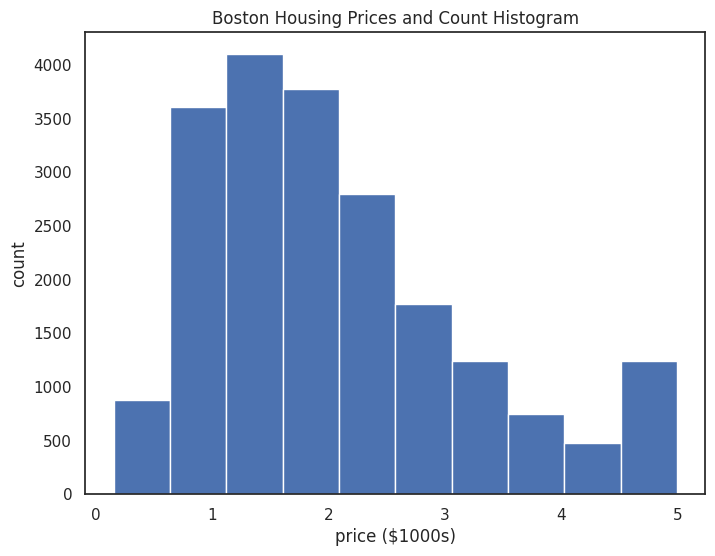

In [ ]:
plt.figure(figsize=(8, 6));
plt.hist(bos_pd['PRICE']);
plt.title('Boston Housing Prices and Count Histogram');
plt.xlabel('price ($1000s)');
plt.ylabel('count');
plt.show();

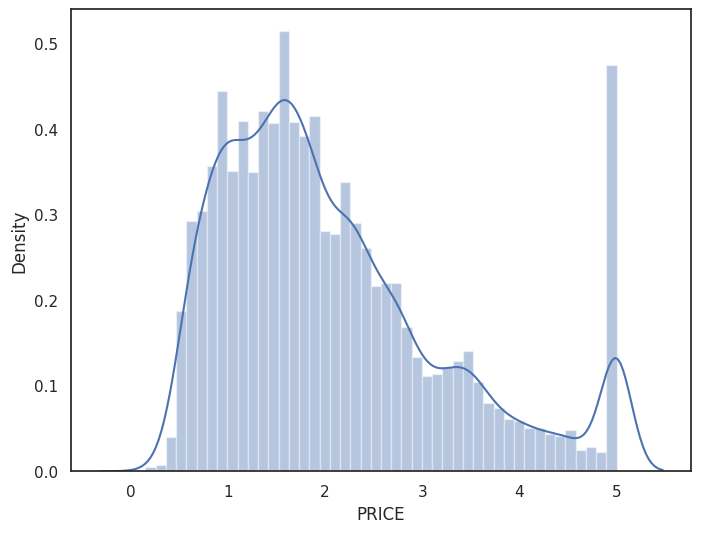

In [ ]:
plt.figure(figsize=(8, 6));
sns.distplot(bos_pd['PRICE']);

From the above output we can see that the values of PRICE is normally distributed with some of the outliers.

#### Heatmap: Two-Dimensional Graphical Representation
- Represent the individual values that are contained in a matrix as colors.
- Create a correlation matrix that measures the linear relationships between the variables.

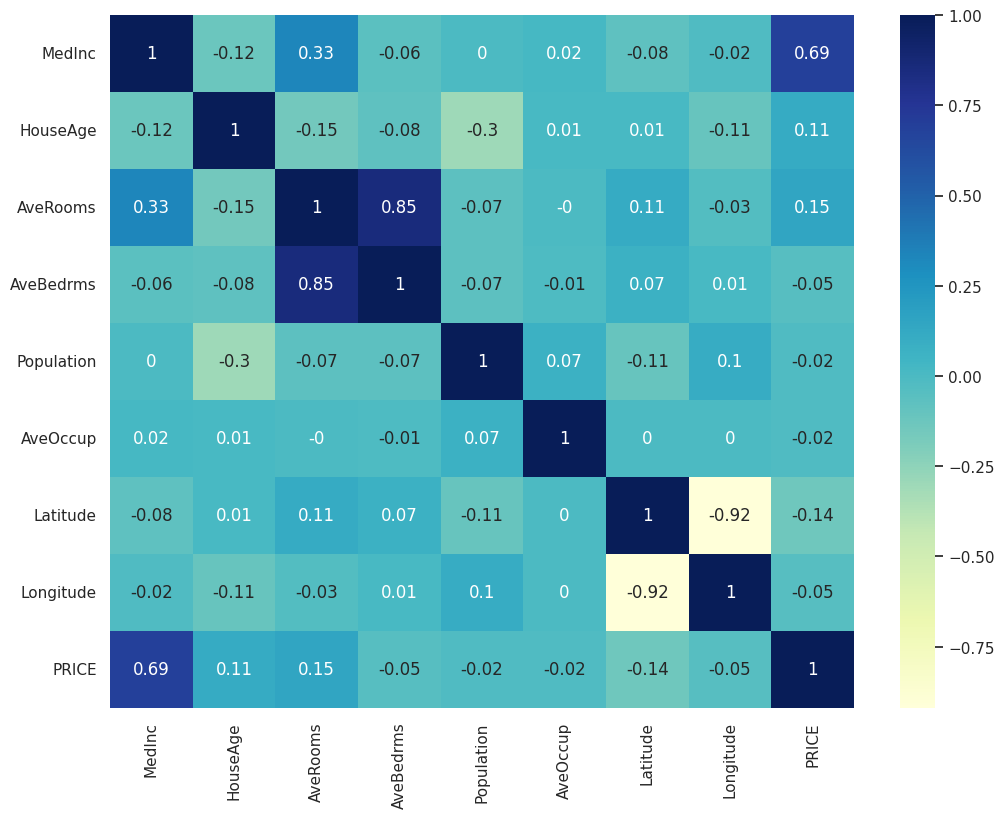

In [ ]:
plt.figure(figsize=(12, 9));
correlation_matrix = bos_pd.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

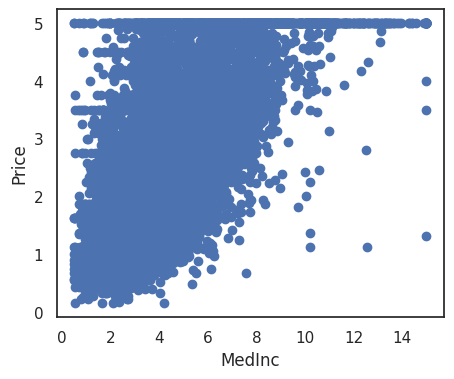

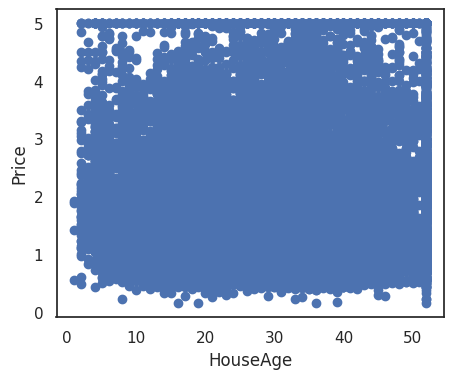

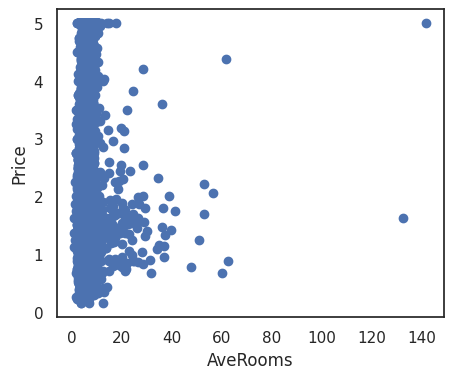

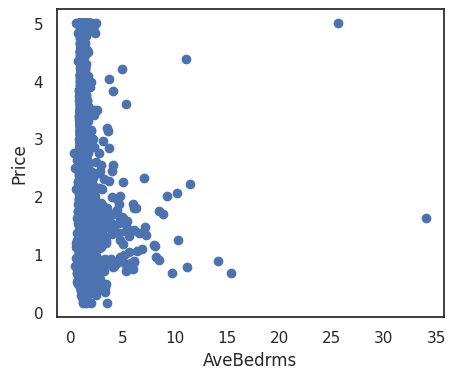

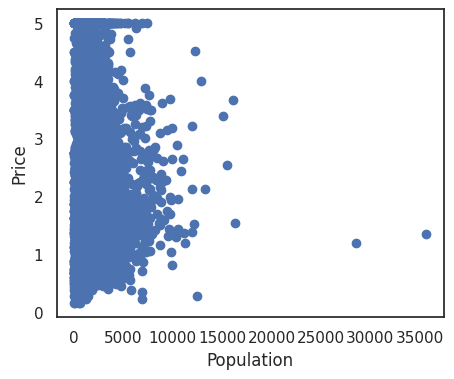

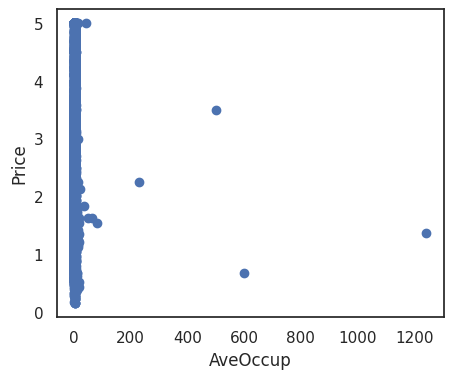

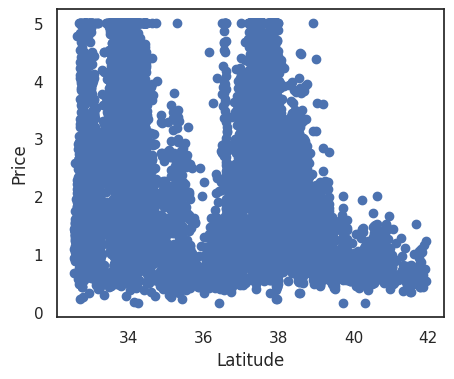

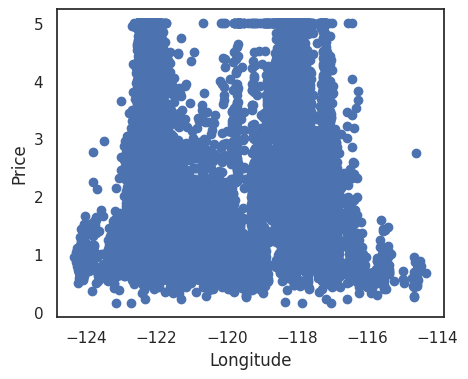

In [ ]:
for feature_name in boston_data.feature_names:
    plt.figure(figsize=(5, 4));
    plt.scatter(bos_pd[feature_name], bos_pd['PRICE']);
    plt.ylabel('Price', size=12);
    plt.xlabel(feature_name, size=12);
plt.show();

Based on the above observations we will plot an `lmplot` between **MedInc** and **PRICE** to see the relationship between the two more clearly.

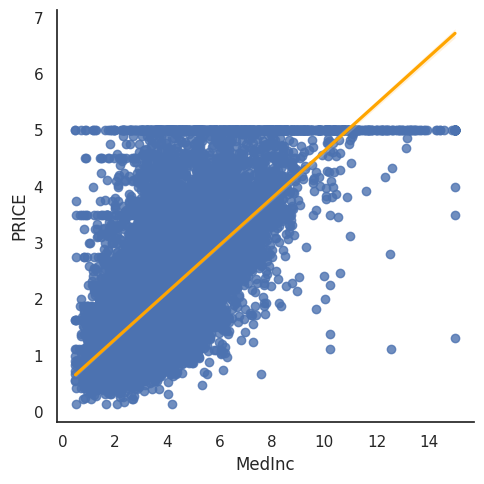

In [ ]:
sns.set(style="white", color_codes=True);
sns.lmplot(x = 'MedInc', y = 'PRICE', data = bos_pd, line_kws={'color': 'orange'});

## <font color="blue">Model Selection Process</font>

![fig_skl](https://miro.medium.com/max/1400/1*LixatBxkewppAhv1Mm5H2w.jpeg)
Image Source: Christophe Bourguignat

- A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable.
- We need to divide the entire data set into two sets:
    + Training set on which we are going to train our algorithm to build a model.
    + Testing set on which we will test our model to see how accurate its predictions are.
    
Before we create the two sets, we need to identify the algorithm we will use for our model.
We can use the `machine_learning_map` map (shown at the top of this page) as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. Using the checklist let’s see under which category our current dataset falls into:
- We have 506 samples: >50? (**Yes**)
- Are we predicting a category? (**No**)
- Are we predicting a quantity? (**Yes**)

Based on the checklist that we prepared above and going by the `machine_learning_map` we can try out **regression methods** such as:

- Linear Regression
- Lasso
- ElasticNet Regression
- Ridge Regression:
- K Neighbors Regressor
- Decision Tree Regressor
- Simple Vector Regression (SVR)
- Ada Boost Regressor
- Gradient Boosting Regressor
- Random Forest Regression
- Extra Trees Regressor

Check the following documents on regresssion:
<a href="https://scikit-learn.org/stable/supervised_learning.html">Supervised learning--scikit-learn</a>,
<a href="https://developer.ibm.com/technologies/data-science/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/">Learn regression algorithms using Python and scikit-learn</a>,
<a href="https://www.pluralsight.com/guides/non-linear-">Non-Linear Regression Trees with scikit-learn</a>.

## <font color="red">Simple Linear Model</font>
- It is difficult to visualize the multiple features.
- We want to predict the house price with just one variable and then move to the regression with all features.
- Because **RM** shows positive correlation with the **House Prices**, we will use **RM** for the model.

In [ ]:
X_rooms = bos_pd.MedInc
y_price = bos_pd.PRICE


X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(20640, 1)
(20640, 1)


#### Splitting the data into training and testing sets
- We split the data into training and testing sets.
- We train the model with 80% of the samples and test with the remaining 20%.
- We do this to assess the model’s performance on unseen data.

In [ ]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = \
             train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(Y_train_1.shape)
print(X_test_1.shape)
print(Y_test_1.shape)

(16512, 1)
(16512, 1)
(4128, 1)
(4128, 1)


#### Training and testing the model
- We use scikit-learn’s LinearRegression to train our model on both the training and check it on the test sets.
- We check the model performance on the train dataset.

In [ ]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 0.8359223196455023
R2 score is 0.47


#### Model Evaluation for Test Set

In [ ]:
y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 0.8430087153316839
R^2: 0.48


The coefficient of determination: 1 is perfect prediction

In [ ]:
print(f'Coefficient of determination: {metrics.r2_score(Y_test_1, y_pred_1) :.4f}')

Coefficient of determination: 0.4849


#### 45-Degree Plot

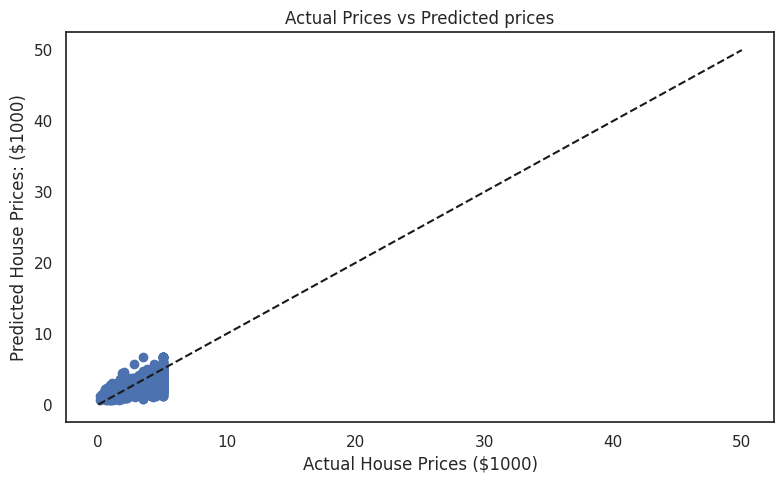

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(Y_test_1, y_pred_1);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

## <font color="red">Linear Regression Model with All Variables</font>
- We want to create a model considering all the features in the dataset.

#### Create the Model

In [ ]:
X = bos_pd.drop('PRICE', axis = 1)
y = bos_pd['PRICE']

- Use the `train_test_split` to split the data into random train and test subsets.
- Everytime you run it without specifying `random_state`, you will get a different result.
- If you use `random_state=some_number`, then you can guarantee the split will be always the same.
- It doesn't matter what the value of `random_state` is:  42, 0, 21, ...
- This is useful if you want reproducible results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

The linear regression model:

In [ ]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

#### Model Evaluation for Training Set

In [ ]:
y_train_predict = reg_all.predict(X_train)

In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 0.7196757085831575
R2 score is 0.61


#### Model Evaluation for Test Set

In [ ]:
y_pred = reg_all.predict(X_test)

In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 0.7455813830127764
R^2: 0.58


The coefficient of determination: 1 is perfect prediction

In [ ]:
print(f'Coefficient of determination: {metrics.r2_score(y_test, y_pred) :.4f}')

Coefficient of determination: 0.5758


#### Error Distribution

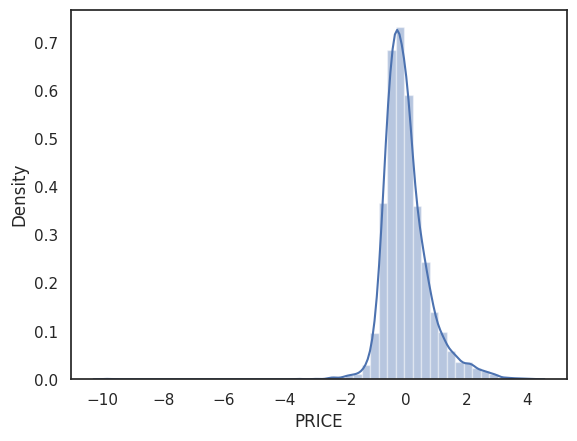

In [ ]:
sns.distplot(y_test - y_pred);

#### 45-Degree Plot

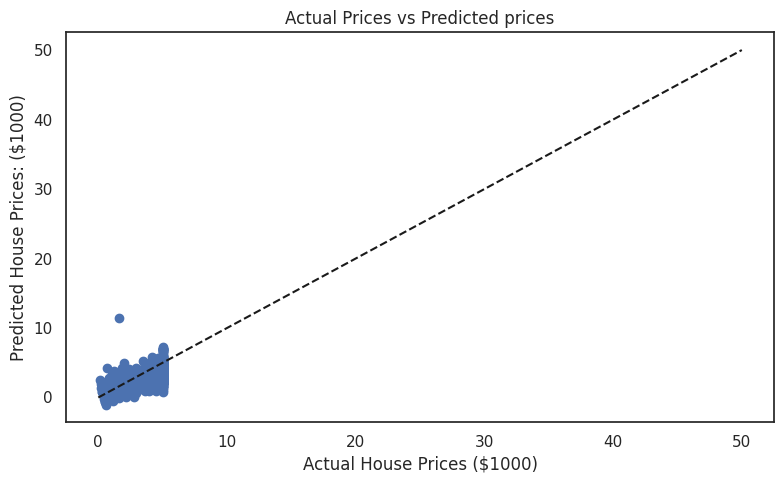

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, y_pred);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

In [ ]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred) ** 2)))

RMS: 0.7455813830127764 


In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

,Actual,Predicted
20046,0.47700,0.719123
3024,0.45800,1.764017
15663,5.00001,2.709659
20484,2.18600,2.838926
9814,2.78000,2.604657
13311,1.58700,2.011754
7113,1.98200,2.645500
7668,1.57500,2.168755
18246,3.40000,2.740746
5723,4.46600,3.915615


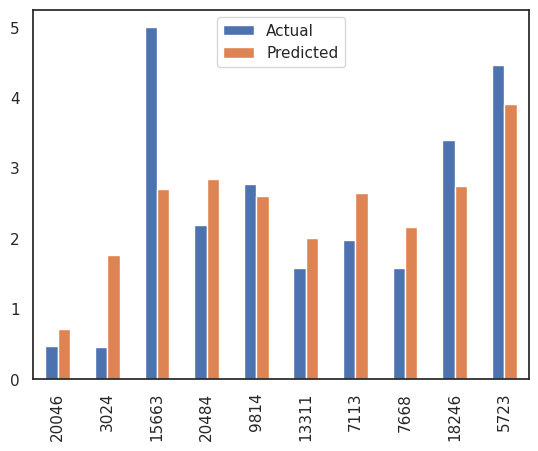

In [ ]:
df2.plot(kind='bar');

## <font color="red">Choosing the Best Model:</font> k-Fold Cross-Validation

- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
- It is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data.
- We use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.
- The biggest advantage of this method is that every data point is used for validation exactly once and for training `k-1` times.
- To choose the final model to use, we select the one that has the lowest validation error.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into `k` groups
3. For each unique group:
       3.1 Take the group as a hold out or test data set
       3.2 Take the remaining k-1 groups as a training data set
       3.3 Fit a model on the training set and evaluate it on the test set
       3.4 Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

How to choose **k**?
- A poorly chosen value for **k** may result in a mis-representative idea of the skill of the model, such as a score with a high variance, or a high bias.
- The choice of **k** is usually 5 or 10, but there is no formal rule. As **k** gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.
- A value of **k=10** is very common in the field of applied machine learning, and is recommend if you are struggling to choose a value for your dataset.

Below is the visualization of a k-fold validation when k=5.
![FIG_kFold](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)
Image Source: https://scikit-learn.org/



              Linear: -0.52, 0.03
               Lasso: -0.95, 0.04
          ElasticNet: -0.77, 0.03
               Ridge: -0.52, 0.03
       BayesianRidge: -0.52, 0.03
                 KNN: -1.15, 0.05
        DecisionTree: -0.51, 0.02
                 SVR: -1.37, 0.05
            AdaBoost: -0.77, 0.06
       GradientBoost: -0.28, 0.02
        RandomForest: -0.26, 0.01


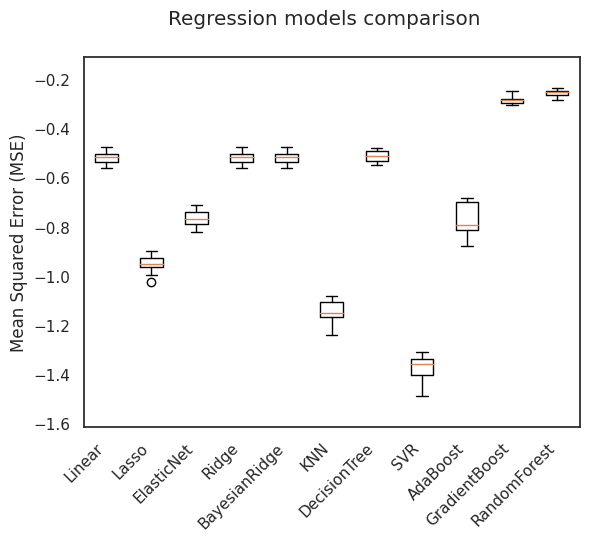

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# user variables to tune
seed    = 9
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = dict()
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["Ridge"]         = Ridge()
models["BayesianRidge"] = BayesianRidge()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()

# 10-fold cross validation for each model
model_results = list()
model_names   = list()
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, shuffle=True, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{:>20}: {:.2f}, {:.2f}".format(model_name, round(results.mean(), 3),
                                  round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure();
figure.suptitle('Regression models comparison');
ax = figure.add_subplot(111);
plt.boxplot(model_results);
ax.set_xticklabels(model_names, rotation = 45, ha="right");
ax.set_ylabel("Mean Squared Error (MSE)");
plt.margins(0.05, 0.1);
#plt.savefig("model_mse_scores.png")
plt.show();
#plt.clf()
#plt.close()

**Based on the above comparison, we can see that `Gradient Boosting Regression` model outperforms all the other regression models.**

## <font color="red">Model with Gradient Boosted Tree</font>


In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_predicted = gbr.predict(X_test)
gbr_expected = y_test

**Root Mean Square Error:**

In [ ]:
print("RMS: %r " % np.sqrt(np.mean((gbr_predicted - gbr_expected) ** 2)))

RMS: 0.5421574495624544 


**The coefficient of determination**: (1 is perfect prediction)

In [ ]:
print('Coeff of determination: {:.4f}'.format(metrics.r2_score(gbr_expected, gbr_predicted)))

Coeff of determination: 0.7757


#### Error Distribution

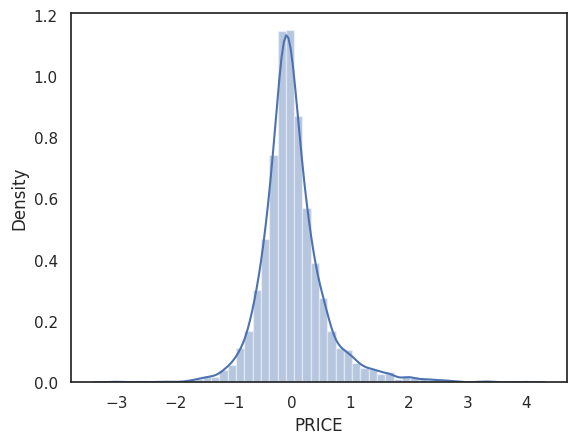

In [ ]:
sns.distplot(gbr_expected - gbr_predicted);

#### 45-Degree Plot

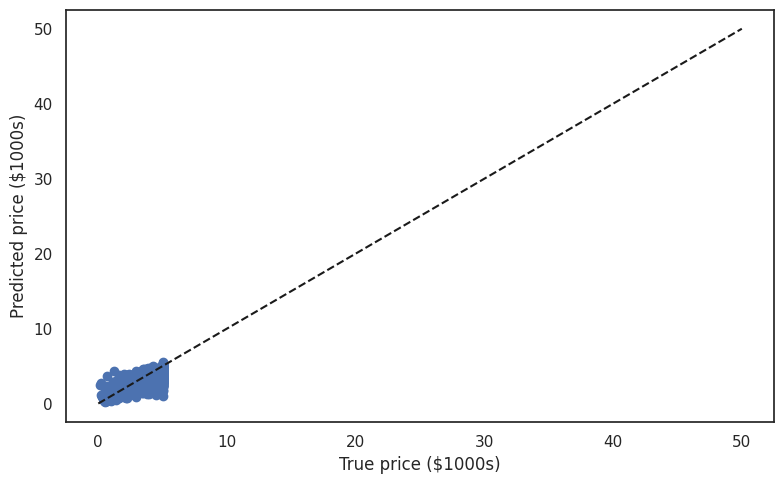

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(gbr_expected, gbr_predicted)
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel('True price ($1000s)');
plt.ylabel('Predicted price ($1000s)');
plt.tight_layout();

**Zoom in:**

In [ ]:
df1 = pd.DataFrame({'Actual': gbr_expected, 'Predicted': gbr_predicted})
df2 = df1.head(10)
df2

,Actual,Predicted
20046,0.47700,0.505188
3024,0.45800,1.093346
15663,5.00001,4.245710
20484,2.18600,2.545174
9814,2.78000,2.279103
13311,1.58700,1.723910
7113,1.98200,2.337197
7668,1.57500,1.719774
18246,3.40000,3.099624
5723,4.46600,4.304469


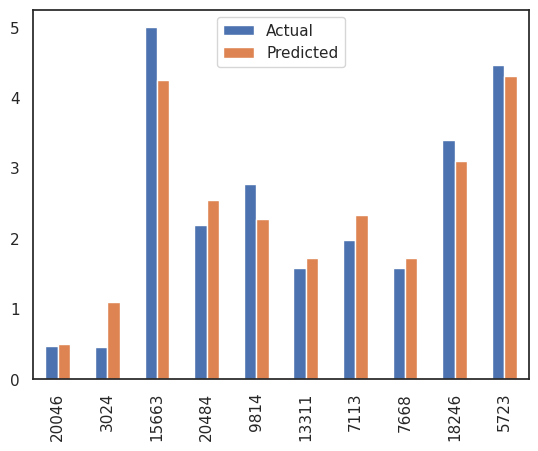

In [ ]:
df2.plot(kind='bar');

#### Feature Importance
- Once we have a trained model, we can understand feature importance (or variable importance) of the dataset which tells us how important each feature is, to predict the target.

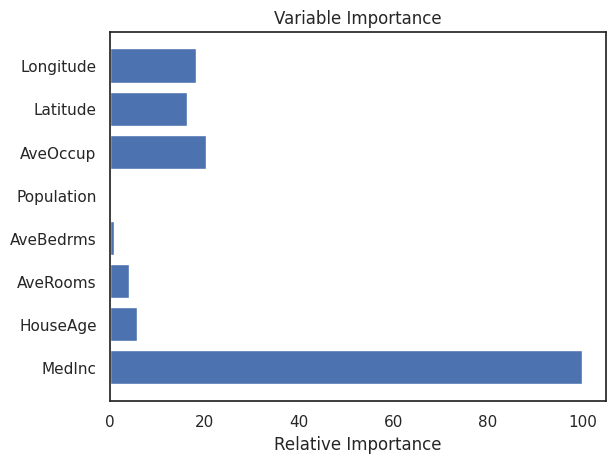

In [ ]:
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance, align='center');
plt.yticks(pos, boston_data.feature_names);
plt.xlabel('Relative Importance');
plt.title('Variable Importance');

**Plot training deviance:**

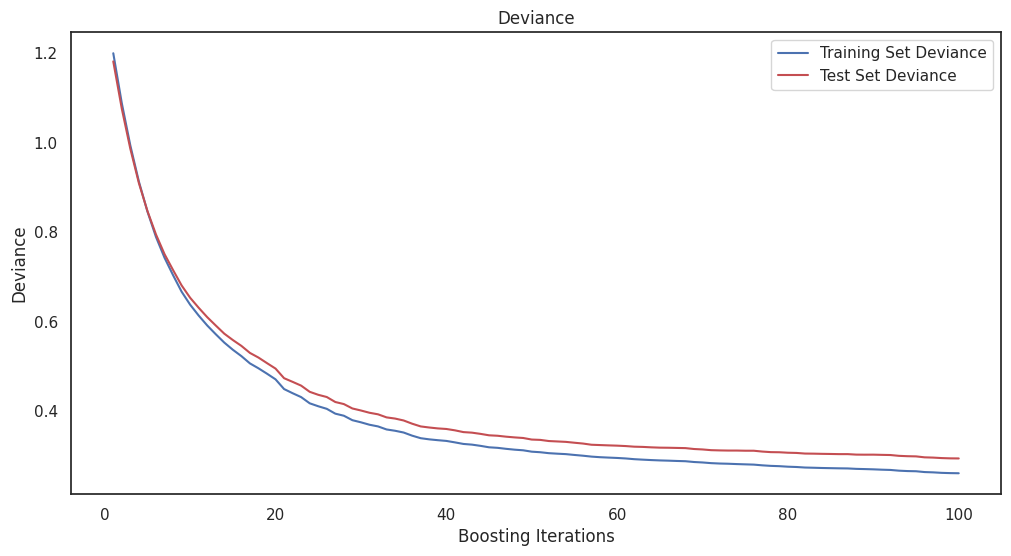

In [ ]:
n_estimators = 100
# compute test set deviance
test_score = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(gbr_expected, y_pred)

plt.figure(figsize=(12, 6));
plt.subplot(1, 1, 1);
plt.title('Deviance');
plt.plot(np.arange(n_estimators) + 1,
         gbr.train_score_, 'b-',
         label='Training Set Deviance');
plt.plot(np.arange(n_estimators) + 1,
         test_score, 'r-',
         label='Test Set Deviance');
plt.legend(loc='upper right');
plt.xlabel('Boosting Iterations');
plt.ylabel('Deviance');

# <font color="blue">Image Classification</font>

## <font color="red"> MNIST Dataset</font>

- The <A HREF="https://en.wikipedia.org/wiki/MNIST_database"> MNIST database</A> (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.
- The database is also widely used for training and testing in the field of machine learning.
- The dataset we will be using contains 70000 images of handwritten digits among which 10000 are reserved for testing.
- This dataset is  suitable for anyone who wants to get started with image classification using Scikit-Learn.

### Obtain the Dataset

In [ ]:
# Python program to read
# image using PIL module

# importing PIL
#from PIL import Image

# Read image
#img = Image.open('abc.png')

# Output Images
#img.show()

In [ ]:
#import pandas as pd
#train_data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
#test_data=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [ ]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)

In [ ]:
print(mnist_data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

### Features of the Dataset

In [ ]:
print("Keys: ", mnist_data.keys())

Keys:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


**Note that the `data` and `target` already separated.**

In [ ]:
print("Shape of Data: ", mnist_data.data.shape)

Shape of Data:  (70000, 784)


In [ ]:
print("Datatype of Data: ", type(mnist_data.data))

Datatype of Data:  <class 'pandas.core.frame.DataFrame'>


In [ ]:
print("Shape of the Target Data: ", mnist_data.target.shape)

Shape of the Target Data:  (70000,)


In [ ]:
print("Datatype of Target Data: ", type(mnist_data.target))

Datatype of Target Data:  <class 'pandas.core.series.Series'>


In [ ]:
print("Feature Names: ", mnist_data.feature_names)

Feature Names:  ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'p

In [ ]:
print("Url: ", mnist_data.url)

Url:  https://www.openml.org/d/554


In [ ]:
np_data, np_target = np.array(mnist_data['data']), np.array(mnist_data['target'])
print(' Shape of data:   {} \n Shape of target: {}'.format(np_data.shape, np_target.shape))

 Shape of data:   (70000, 784) 
 Shape of target: (70000,)


**Checking the Data**

In [ ]:
len(np.unique(np_data))

256

In [ ]:
np_data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
len(np.unique(np_data[0]))

85

**Checking the Target**

In [ ]:
print("Datatype of the target values: ", np_target.dtype)

Datatype of the target values:  object


In [ ]:
type(np_target[0])

str

Print few values:

In [ ]:
print(np_target[0:5])

['5' '0' '4' '1' '9']


Changing the labels from string to integers:

In [ ]:
np_target = np_target.astype(np.uint8)

In [ ]:
print(np_target[0:5])

[5 0 4 1 9]


Print the number of unique labels:

In [ ]:
len(np.unique(np_target))

10

There are 70000 numbers, each stored as an array of 784 numbers depicting the opacity of each pixel, it can be displayed by reshaping the data into a 28x28 array and plotting using matplotlib

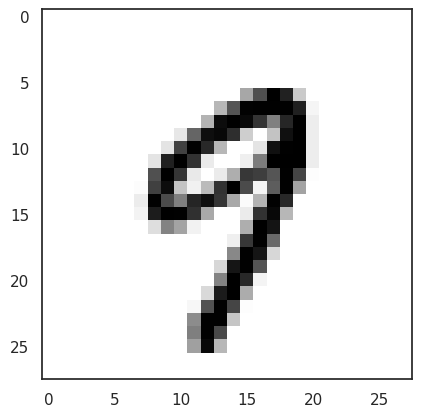

In [ ]:
some_index = 15657
some_digit = np_data[some_index]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis=('off')

In [ ]:
np_target[some_index]

9

**Display few images**

In [ ]:
def display_digits(X, y):
    """
      Given an array of images of digits X and
      the corresponding values of the digit y,
      this function plots the first 96 images and their values.
    """
    # Figure size (width, height) in inches
    fig = plt.figure(figsize=(8, 6))

    # Adjust the subplots
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(96):
        # Initialize the subplots:
        #    Add a subplot in the grid of 8 by 12, at the i+1-th position
        ax = fig.add_subplot(8, 12, i + 1, xticks=[], yticks=[])

        # Display an image at the i-th position
        ax.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')

        # label the image with the target value
        ax.text(0, 7, str(y[i]))

    # Show the plot
    plt.show()

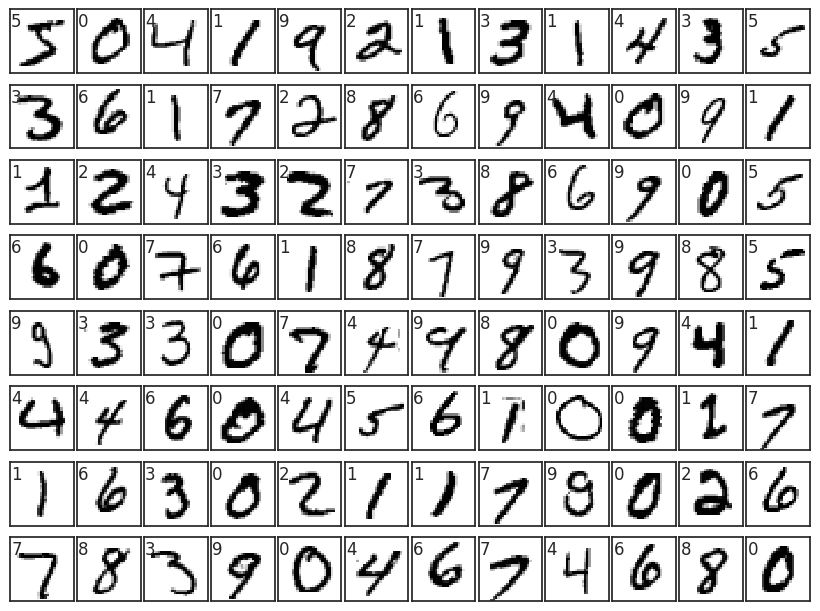

In [ ]:
display_digits(np_data, np_target)

### <font color="red">Separating the Training and Testing Set</font>

In [ ]:
num_train = 60000

X_train = np_data[:num_train]
X_test  = np_data[num_train:]
y_train = np_target[:num_train]
y_test  = np_target[num_train:]

In [ ]:
print('Train Data: ', X_train, '\n', 'Test Data:', X_test, '\n',
     'Train label: ', y_train, '\n', 'Test Label: ', y_test)

Train Data:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 Test Data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 Train label:  [5 0 4 ... 5 6 8] 
 Test Label:  [7 2 1 ... 4 5 6]


**Shuffle the training set:**

In [ ]:
shuffle_index = np.random.permutation(num_train)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

**Sklearn Method**

In [ ]:
#from sklearn.model_selection import train_test_split

#x=np.array(data)
#y=np.array(target)
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

###  <font color="red">Training a Binary Classifier</font>

- Binary classification means there are two classes to work with that relate to one another as true and false.
- Here, we want to identify a single digit: looking at 9s.
- The classification will tell us if we have a 9 (true) or not (false).

**Set the target arrays as boolean arrays:** true if 9 otherwise false.

In [ ]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

**Create and train the model:**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf =SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(random_state=42)

**Make a prediction:**

In [ ]:
some_digit_predict = sgd_clf.predict([some_digit])

In [ ]:
some_digit_predict

array([ True])

**Measuring accuracy using cross validation**

- The `stratifiedKfold` class performs stratified sampling to produce folds that contain a representative ratio of each class.
- At each iteration the code creates a clone of the classifier, trains that clone on the training fold and then makes predictions on the test fold.
- It then counts the number of correct predictions and outputs the ratio of correct predictions.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_9[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9337
0.92275
0.94435


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring='accuracy')

array([0.89295, 0.94225, 0.9509 ])

The sklearn cross_val_score in action returning the same result.

In [ ]:
print('94-96% accuracy might not as impressive as it sounds where there are {:.2f} percent 9s in the dataset'.format(sum(np_target==9)/len(np_target)*100))

94-96% accuracy might not as impressive as it sounds where there are 9.94 percent 9s in the dataset


**Confusion matrix**

- A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier.
- It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.
- The confusion matrix is a much better way to evaluate the performance of a classifier, especially when there is a skewed dataset as we have here with only 10% of the dataset being the target.
- Each row represents a class, each column a prediction:
   * The first row is negative cases (non-9s) with the top left containing all the correctly classified non-9s (True Negatives), the top right the 9s incorrectly classified as non-9s (False-Positves).
   * The second row represents the positive class, 9s in this case, bottom left contains the 9s incorrectly classified as non-9s (False Negatives), the bottom right containing the correctly classified 9s (True Positives)
   
| | Actual | |
| --- |: --- |: --- |
| **Prediction** | True Positive | False Positive |
| | False Negative | True Negative |

We first need a set of predictions to compare to the actual targets:

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_9, y_train_pred)

array([[50729,  3322],
       [  956,  4993]])

**Precision/Recall**

- Precision measures the number of true positives (correctly classified 9s) as a ratio of the total samples classified as a 9: $\frac{TP}{TP + FP}$
- Recall measueres the number of true positives as a ratio of the total number of positives: $\frac{TP}{TP + FN}$
- Depending on the scenario the model may be modified to try and maximise one or the other, catching all positive instances at the expense of catching some false positives. Or making sure a positive instance is never falsely identified as a negative at the expense of missing some of the positive instances.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3, method='decision_function')

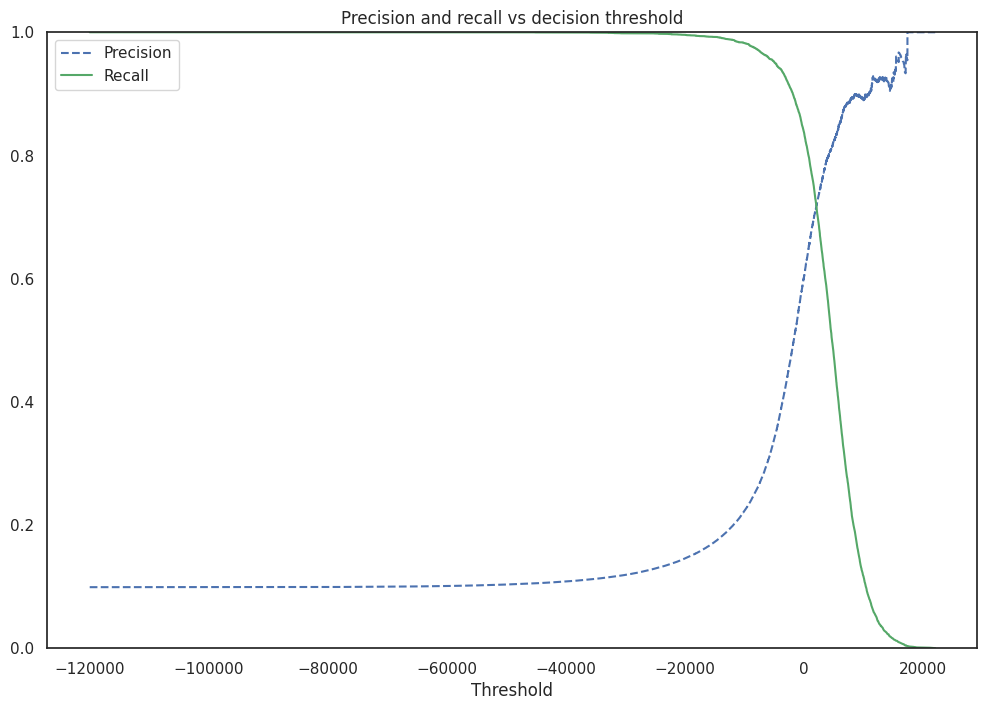

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(12,8))
    plt.title('Precision and recall vs decision threshold')
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### <font color="red">Training and Prediction on the Entire Dataset</font>

- We will use the Stochastic Gradient Descent classifier (SGD).
- Scikit-Learn’s SGDClassifier is a good starting point for linear classifiers.
- Using the loss parameter we will see how Support Vector Machine (Linear SVM) and Logistic Regression perform for the same dataset.


#### Using Linear Support Vector Machine (SVM)
- We use linear SVM with stochastic gradient descent (SGD) learning.
- The gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule.
- To use the Linear SVM Classifier, we need to set the loss parameter to `hinge`.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

- Before testing the model, it is a good practice to first see the cross-validation scores on the training data.
- That you will give you a very good projection of how the model performs.

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.88495, 0.86625, 0.87715])

* For three-fold Cross-Validation you are getting around 87% – 88% accuracy.
* Not too bad, not too good either.

We can now compute the actual test scores:

In [ ]:
scoreSVM = sgd_clf.score(X_test, y_test)
print("Test score of the Linear SVM: ", scoreSVM)

Test score of the Linear SVM:  0.8858


### Using Logistic Regression

In [ ]:
sgd_clf = SGDClassifier(loss='log', random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=42)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.88225, 0.86905, 0.8724 ])

In [ ]:
scoreLR = sgd_clf.score(X_test, y_test)
print("Test score of the Logistic Regression: ", scoreLR)

Test score of the Logistic Regression:  0.8819


### Random Forest Classifier

- Random forests is a supervised learning algorithm.
- A forest is comprised of trees.
- It is said that the more trees it has, the more robust a forest is.
- Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.
- It also provides a pretty good indicator of the feature importance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 500)
forest = forest.fit(X_train, y_train)

In [ ]:
forest_output = forest.predict(X_test)

Calculate accuracy on the prediction:

In [ ]:
print("Random Forest with n_estimators:500")
print(accuracy_score(y_test, forest_output))

Random Forest with n_estimators:500
0.9716


Display few true images against predictions:

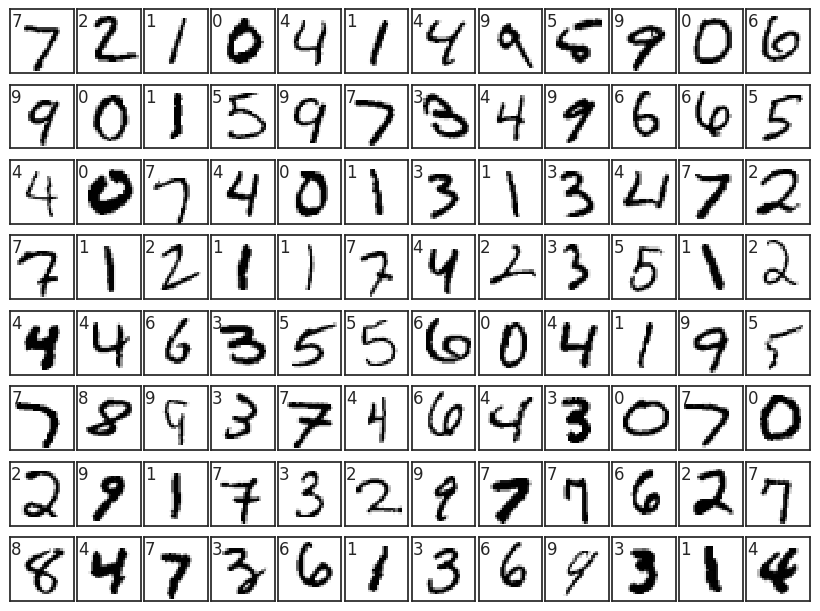

In [ ]:
display_digits(X_test, forest_output)

### Gradient Boosting Classifier



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train,y_train)

In [ ]:
gradient_output = clf.predict(X_test)

Calculate accuracy on the prediction:

In [ ]:
print(accuracy_score(y_test, gradient_output))

0.7355


Display few true images against predictions:

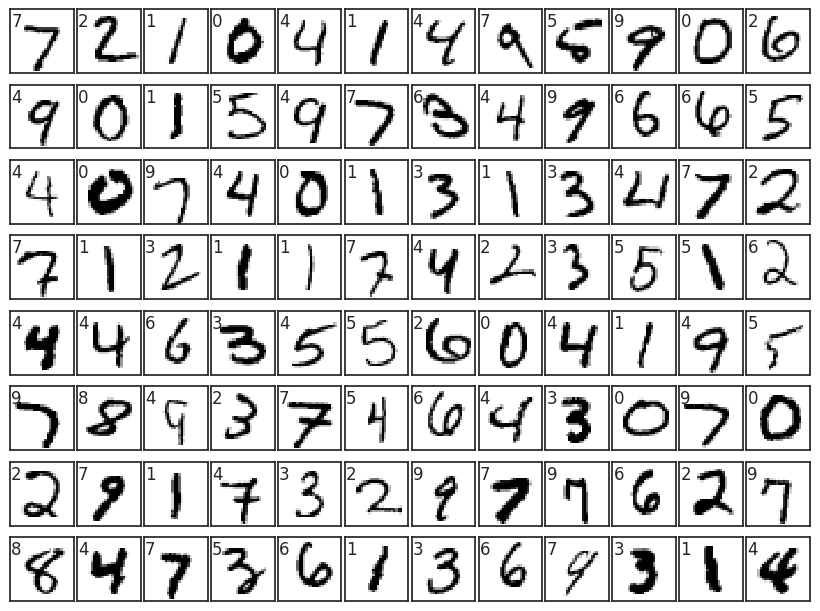

In [ ]:
display_digits(X_test, gradient_output)

### MLP Classifier

- The Multi-layer Perceptron classifier relies on an underlying Neural Network to perform the task of classification.

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(16,), random_state=1, verbose=True)
clf.fit(X_train, y_train)
neural_output = clf.predict(X_test)

Iteration 1, loss = 2.64234102
Iteration 2, loss = 2.21042152
Iteration 3, loss = 2.15413327
Iteration 4, loss = 2.12166229
Iteration 5, loss = 2.10806100
Iteration 6, loss = 2.10936567
Iteration 7, loss = 2.09845572
Iteration 8, loss = 2.08507914
Iteration 9, loss = 2.08734593
Iteration 10, loss = 2.07147042
Iteration 11, loss = 2.07465223
Iteration 12, loss = 2.07096022
Iteration 13, loss = 2.07448635
Iteration 14, loss = 2.05337641
Iteration 15, loss = 2.06949908
Iteration 16, loss = 2.05398431
Iteration 17, loss = 2.04533085
Iteration 18, loss = 2.06923699
Iteration 19, loss = 2.04814427
Iteration 20, loss = 2.04537880
Iteration 21, loss = 2.05252909
Iteration 22, loss = 2.03959850
Iteration 23, loss = 2.04988964
Iteration 24, loss = 2.04745312
Iteration 25, loss = 2.04347731
Iteration 26, loss = 2.04566111
Iteration 27, loss = 2.05723201
Iteration 28, loss = 2.05659409
Iteration 29, loss = 2.03849536
Iteration 30, loss = 2.08848723
Iteration 31, loss = 2.07485074
Iteration 32, los

Calculate accuracy on the prediction:

In [ ]:
print("sgd: ", accuracy_score(y_test, neural_output))

sgd:  0.2037


Display few true images against predictions:

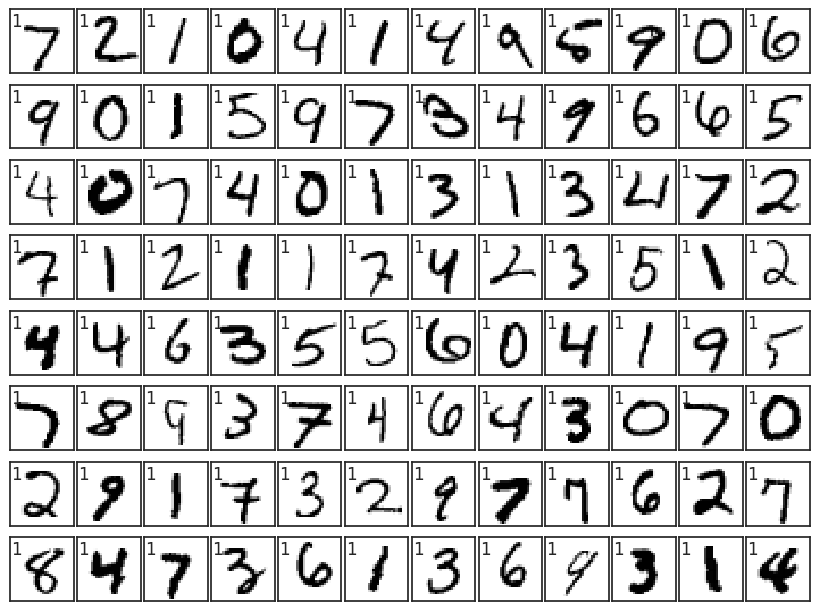

In [ ]:
display_digits(X_test, neural_output)

In [ ]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(16,), random_state=1)
clf.fit(X_train, y_train)
neural_output = clf.predict(X_test)

Calculate accuracy on the prediction:

In [ ]:
print("lbfgs: ", accuracy_score(y_test, neural_output))

lbfgs:  0.3981


Display few true images against predictions:

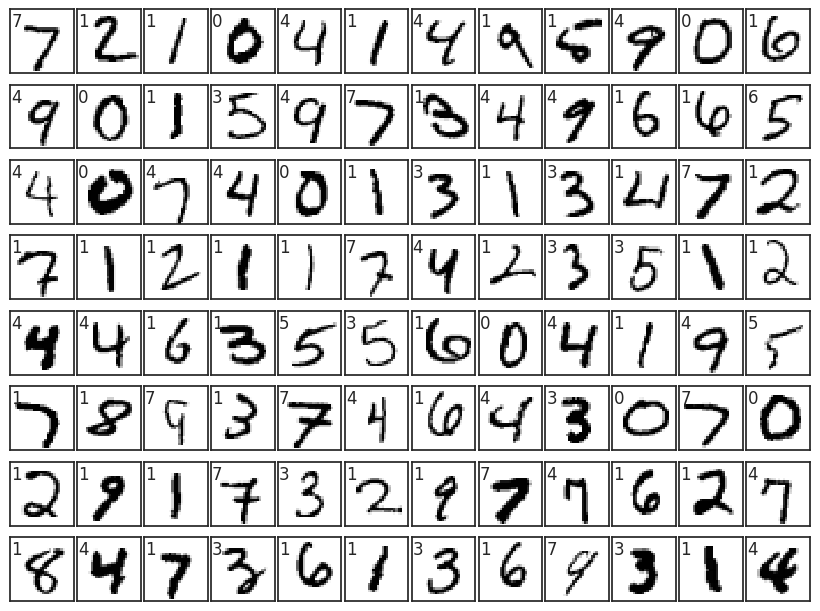

In [ ]:
display_digits(X_test, neural_output)

**What Model has Learned**



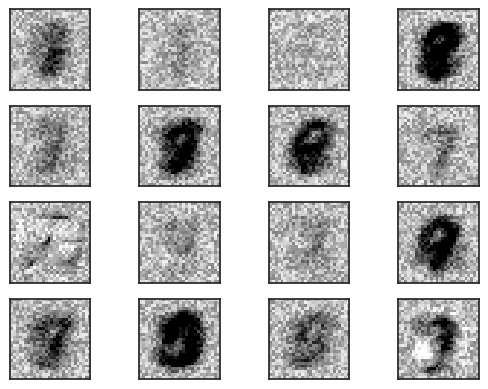

In [ ]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

**Let's Test the Model**

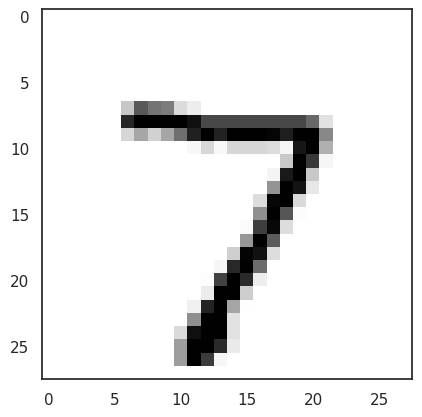

In [ ]:
plt.imshow(X_test[0].reshape(28,28),cmap='Greys')

In [ ]:
y_pred_sample= clf.predict(X_test[[0]])
print("The answer is",int(y_pred_sample),".")

The answer is 7 .


Sklearn.neural_network MLPClassifer doesn't support GPU, doesn't support convolution layers .etc.

But it's quite simple and allows us to program shorter.
Thanks for reading this notebook. Feel free to comment and compare Tensorflow.keras one, Pytorch one

## Useful Links

- <a href="https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660">Calculating Simple Linear Regression and Linear Best Fit an In-depth Tutorial with Math and Python</a>
- <a href="https://scikit-learn.org/stable/tutorial/index.html">scikit-learn Tutorials</a>
- <a href="https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a">Sklearn Linear Regression Tutorial with Boston House Dataset</a>
- <a href="https://www.dataquest.io/blog/sci-kit-learn-tutorial/">Scikit-learn Tutorial: Machine Learning in Python</a>
- <a href="https://debuggercafe.com/image-classification-with-mnist-dataset/">Image Classification with MNIST Dataset</a>
- <a href="https://davidburn.github.io/notebooks/mnist-numbers/MNIST%20Handwrititten%20numbers/">MNIST handwritten number identification</a>